In [948]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, RobustScaler
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas_profiling import ProfileReport
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [949]:
def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [950]:
# create ProfileReport
def createProfileReport(df):
    dt = datetime.now().strftime("%H%M%d%m%Y")  # current dateTime for fileName
    profile = ProfileReport(df, minimal=True)
    fileName = f"DataAnalysis{dt}"
    profile.to_file(output_file=fileName+'.html')
    return f"{fileName}.html"

In [951]:
data=pd.read_csv("C:\\Users\\beatb\\OneDrive\\Documents\\5. Semester\\Maschine_Learning\\Projekt\\fhgr-3-s-ml-project-group-2\\beat\\beijing_original.csv",encoding="iso-8859-1", low_memory=False)
df = data.drop(['url', 'id', 'Cid', 'DOM', 'price'], axis=1)

In [952]:
display(df.columns)

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage'],
      dtype='object')

In [953]:
df

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,106,415.0,131.00,2,1,1,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016-07-28,126,575.0,132.38,2,2,1,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016-12-11,48,1030.0,198.00,3,2,1,3,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016-09-30,138,297.5,134.00,3,1,1,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016-08-28,286,392.0,81.00,2,1,1,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,116.546899,39.755236,2016-06-10,8,350.0,170.07,3,2,1,2,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,116.497474,39.810115,2016-06-10,1,108.8,35.09,1,0,1,1,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,116.497256,39.804081,2016-06-05,2,359.0,102.17,2,2,1,2,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,116.501794,39.799347,2016-06-12,4,720.0,178.34,4,2,1,2,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [954]:
df.isnull().sum()

Lng                       0
Lat                       0
tradeTime                 0
followers                 0
totalPrice                0
square                    0
livingRoom                0
drawingRoom               0
kitchen                   0
bathRoom                  0
floor                     0
buildingType           2021
constructionTime          0
renovationCondition       0
buildingStructure         0
ladderRatio               0
elevator                 32
fiveYearsProperty        32
subway                   32
district                  0
communityAverage        463
dtype: int64

In [955]:
df=df.drop(df[df.drop(['buildingType', 'communityAverage'], axis=1).isnull().any(axis=1)].index, axis=0)

In [956]:
df.loc[df["communityAverage"].isnull()==True, ["communityAverage"]].isna().sum()
#Was machen wir damit?


communityAverage    463
dtype: int64

In [957]:
df.isnull().sum()

Lng                       0
Lat                       0
tradeTime                 0
followers                 0
totalPrice                0
square                    0
livingRoom                0
drawingRoom               0
kitchen                   0
bathRoom                  0
floor                     0
buildingType           2021
constructionTime          0
renovationCondition       0
buildingStructure         0
ladderRatio               0
elevator                  0
fiveYearsProperty         0
subway                    0
district                  0
communityAverage        463
dtype: int64

In [958]:
display(df)

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,106,415.0,131.00,2,1,1,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016-07-28,126,575.0,132.38,2,2,1,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016-12-11,48,1030.0,198.00,3,2,1,3,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016-09-30,138,297.5,134.00,3,1,1,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016-08-28,286,392.0,81.00,2,1,1,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,116.546899,39.755236,2016-06-10,8,350.0,170.07,3,2,1,2,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,116.497474,39.810115,2016-06-10,1,108.8,35.09,1,0,1,1,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,116.497256,39.804081,2016-06-05,2,359.0,102.17,2,2,1,2,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,116.501794,39.799347,2016-06-12,4,720.0,178.34,4,2,1,2,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [959]:
df.loc[:,["floor"]]=df["floor"].str.replace("[¸ß ÖÐµ×Í¶¥Î´ª]","")

In [960]:
df['floor']

0         26
1         22
2          4
3         21
4          6
          ..
318846     5
318847    24
318848     7
318849     5
318850    17
Name: floor, Length: 318819, dtype: object

In [961]:
df["livingRoom"]=pd.to_numeric(df["livingRoom"], errors='coerce')
df["drawingRoom"]=pd.to_numeric(df["drawingRoom"], errors='coerce')
df["bathRoom"]=pd.to_numeric(df["bathRoom"], errors='coerce')
df["constructionTime"]=pd.to_numeric(df["constructionTime"], errors='coerce')
df["floor"]=pd.to_numeric(df["floor"], errors='coerce')

In [962]:
df.dtypes

Lng                    float64
Lat                    float64
tradeTime               object
followers                int64
totalPrice             float64
square                 float64
livingRoom               int64
drawingRoom              int64
kitchen                  int64
bathRoom                 int64
floor                    int64
buildingType           float64
constructionTime       float64
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [963]:
df.isna().sum()

Lng                        0
Lat                        0
tradeTime                  0
followers                  0
totalPrice                 0
square                     0
livingRoom                 0
drawingRoom                0
kitchen                    0
bathRoom                   0
floor                      0
buildingType            2021
constructionTime       19283
renovationCondition        0
buildingStructure          0
ladderRatio                0
elevator                   0
fiveYearsProperty          0
subway                     0
district                   0
communityAverage         463
dtype: int64

In [964]:


print(str((df['constructionTime'].isnull().sum()/df['constructionTime'].count())*100)+"% missing values")
print()
df=df.drop(['constructionTime'], axis=1)

6.437623524384381% missing values



In [965]:
df.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'renovationCondition', 'buildingStructure',
       'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'district',
       'communityAverage'],
      dtype='object')

In [966]:
#scaler = MinMaxScaler(feature_range=(-1,1))
#scaler.fit(df)
#X_scaled = scaler.transform(df)
#df_scaled= pd.DataFrame(X_scaled, columns=df.columns)
#display(X_scaled)


In [967]:

#createProfileReport(df)

In [968]:
df.isna().sum()

Lng                       0
Lat                       0
tradeTime                 0
followers                 0
totalPrice                0
square                    0
livingRoom                0
drawingRoom               0
kitchen                   0
bathRoom                  0
floor                     0
buildingType           2021
renovationCondition       0
buildingStructure         0
ladderRatio               0
elevator                  0
fiveYearsProperty         0
subway                    0
district                  0
communityAverage        463
dtype: int64

In [969]:


df=df.drop(['Lng','Lat','communityAverage', 'buildingType'], axis=1)

In [970]:
df["tradeTime"]=pd.to_datetime(df["tradeTime"])

In [971]:
df['tradeYear']=df['tradeTime'].dt.year
df['tradeMonth']=df['tradeTime'].dt.month
df['tradeDay']=df['tradeTime'].dt.day

In [972]:
df.head()

,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,tradeYear,tradeMonth,tradeDay
0,2016-08-09,106,415.0,131.00,2,1,1,1,26,3,6,0.217,1.0,0.0,1.0,7,2016,8,9
1,2016-07-28,126,575.0,132.38,2,2,1,2,22,4,6,0.667,1.0,1.0,0.0,7,2016,7,28
2,2016-12-11,48,1030.0,198.00,3,2,1,3,4,3,6,0.500,1.0,0.0,0.0,7,2016,12,11
3,2016-09-30,138,297.5,134.00,3,1,1,1,21,1,6,0.273,1.0,0.0,0.0,6,2016,9,30
4,2016-08-28,286,392.0,81.00,2,1,1,1,6,2,2,0.333,0.0,1.0,1.0,1,2016,8,28


In [973]:
df['tradeYear'].unique()

array([2016, 2017, 2018, 2010, 2011, 2012, 2013, 2014, 2015, 2008, 2002,
       2003, 2009], dtype=int64)

In [974]:
nr_year=[]
for x in sorted(df['tradeYear'].unique()):
    nr_year.append(df["totalPrice"].where(x==df["tradeYear"]).count())

In [975]:
nr_year

[3, 1, 1, 1, 177, 6003, 37216, 38747, 32600, 69803, 90829, 43217, 221]

In [976]:
nr_month=[]
for x in df['tradeMonth'].unique():
    nr_month.append(df["totalPrice"].where(x==df["tradeMonth"]).count())

In [977]:
nr_month

[30628,
 26659,
 31642,
 28084,
 23683,
 24847,
 38048,
 24466,
 21042,
 24980,
 22660,
 22080]

In [978]:
nr_day=[]
for x in df['tradeDay'].unique():
    nr_day.append(df["totalPrice"].where(x==df["tradeDay"]).count())


In [979]:
nr_day

[10052,
 12347,
 10181,
 11031,
 10467,
 9897,
 10356,
 8987,
 9989,
 10682,
 8846,
 10565,
 10638,
 11191,
 10560,
 10319,
 11368,
 11221,
 11987,
 10940,
 10344,
 10676,
 10239,
 10775,
 7957,
 10196,
 10801,
 10402,
 10311,
 7233,
 8261]

([<matplotlib.axis.XTick at 0x1b92ec267a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

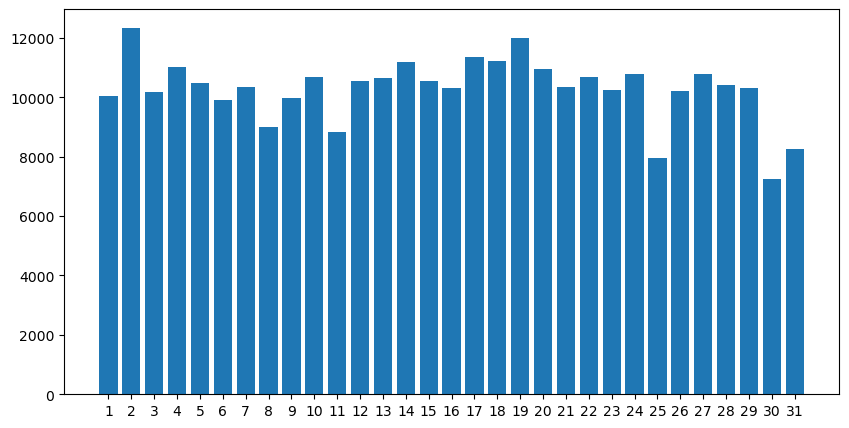

In [980]:
plt.figure(figsize=(10,5))
#print(nr_day)
plt.bar(sorted(df['tradeDay'].unique()),nr_day)
plt.xticks(np.arange(min(sorted(df['tradeDay'].unique())), max(sorted(df['tradeDay'].unique())) + 1))
#Trades sind gleichmässig auf Tage verteilt

[30628, 26659, 31642, 28084, 23683, 24847, 38048, 24466, 21042, 24980, 22660, 22080]


([<matplotlib.axis.XTick at 0x1b7c8a7e950>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

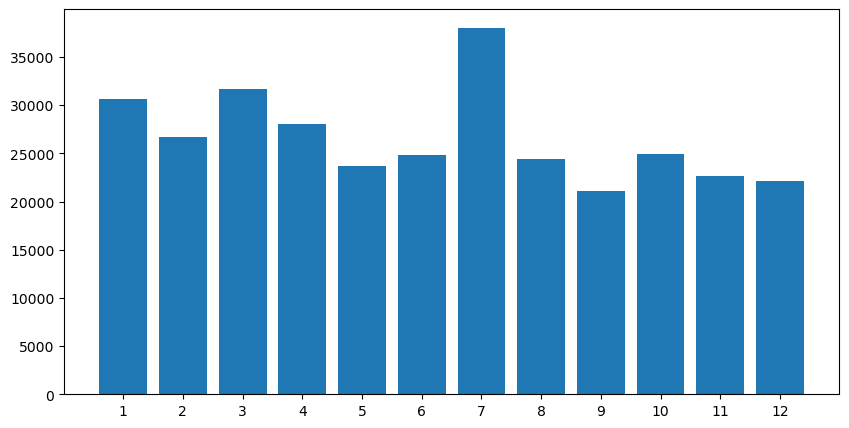

In [981]:
plt.figure(figsize=(10,5))
print(nr_month)
plt.bar(sorted(df['tradeMonth'].unique()),nr_month)
plt.xticks(np.arange(min(sorted(df['tradeMonth'].unique())), max(sorted(df['tradeMonth'].unique())) + 1))
#Trades sind gleichmässig auf Tage verteilt

[3, 1, 1, 1, 177, 6003, 37216, 38747, 32600, 69803, 90829, 43217, 221]


([<matplotlib.axis.XTick at 0x1b92f1baf80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

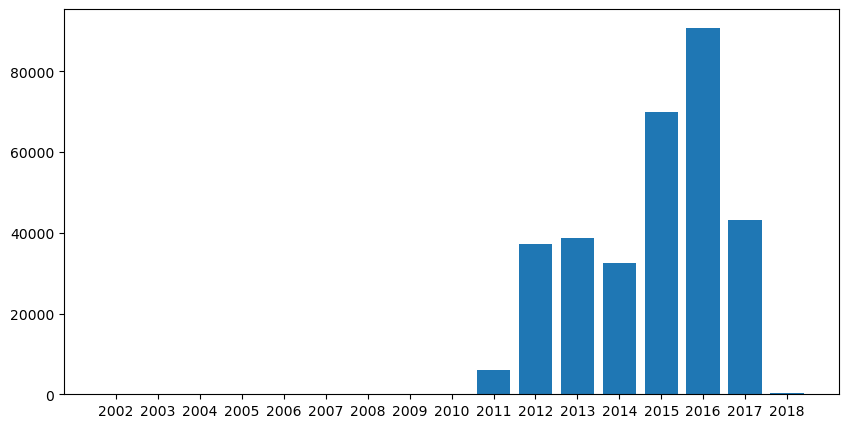

In [982]:
plt.figure(figsize=(10,5))
print(nr_year)
plt.bar(sorted(df['tradeYear'].unique()),nr_year)
plt.xticks(np.arange(min(sorted(df['tradeYear'].unique())), max(sorted(df['tradeYear'].unique())) + 1))
#Was machen mit den Jahrgängen mit wenig Daten?

In [983]:
mean_day=[]
for x in df['tradeDay'].unique():
    mean_day.append(df["totalPrice"].where(x==df["tradeDay"]).mean())

[347.75825706327055, 358.2389082368177, 345.92228661231644, 359.32743178315565, 350.52615840259796, 353.74163888046843, 344.74256469679335, 332.63648603538434, 346.2908599459397, 352.16964987829925, 333.54200768708995, 344.2411263606239, 348.3393777025751, 352.6204092574377, 352.5101799242415, 356.1419032852013, 350.69146727656477, 352.9198912752866, 357.8434804371393, 349.62829067641616, 341.7087490332552, 352.75298801049007, 346.38618029104344, 354.4831461716924, 372.31824808344777, 344.8930266771275, 355.6401166558643, 348.8340992116893, 351.3242168557841, 321.17139499516173, 323.2240890933304]


([<matplotlib.axis.XTick at 0x1b92f093af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

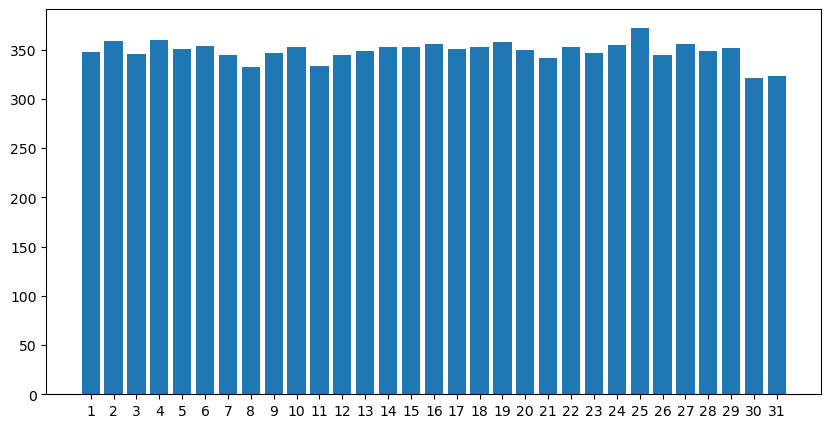

In [984]:
print(mean_day)
plt.figure(figsize=(10,5))
plt.bar(sorted(df['tradeDay'].unique()),mean_day)
plt.xticks(np.arange(min(sorted(df['tradeDay'].unique())), max(sorted(df['tradeDay'].unique())) + 1))

In [985]:
df.where(df['ladderRatio']>10).dropna()
#Suche der zwei ausreisser

,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,tradeYear,tradeMonth,tradeDay
61036,2017-02-12,21.0,325.0,47.22,1.0,1.0,1.0,1.0,13.0,4.0,6.0,10009400.0,1.0,1.0,0.0,7.0,2017.0,2.0,12.0
148467,2014-02-18,7.0,176.8,47.22,1.0,1.0,1.0,1.0,13.0,1.0,6.0,10009400.0,1.0,0.0,0.0,7.0,2014.0,2.0,18.0


In [986]:
df=df.drop([61036, 148467],axis=0)
#Löschen der ausreisser

<AxesSubplot:>

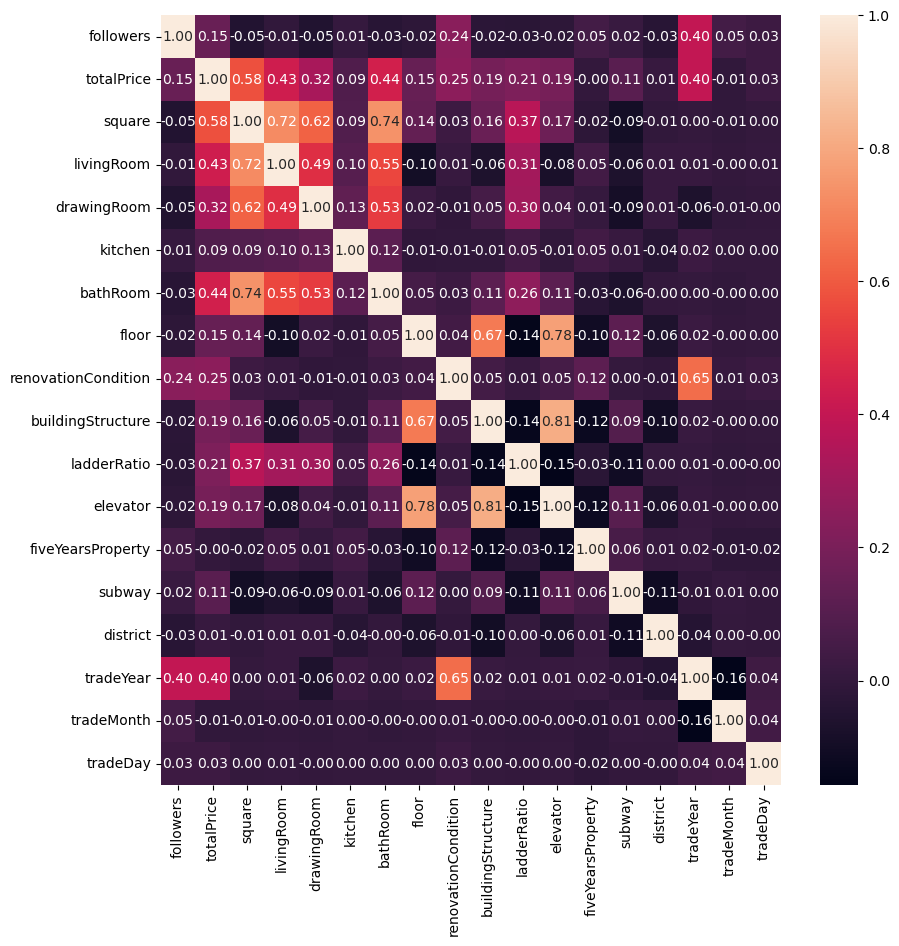

In [987]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df.corr(), annot=True,fmt='.2f')

In [988]:
df=df.drop(['tradeTime', 'tradeYear'],axis=1)



In [989]:
df=df.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['totalPrice'], axis=1),
    df['totalPrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

# create linear regression
regr = linear_model.LinearRegression()
# train model using training set
reg = regr.fit(X_train,y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)
# intercept
print('intercept: ', reg.intercept_)



Coefficients:  [  0.8754082    2.99978324  23.48885868 -15.57357757  73.71664072
  19.12837026  -0.53623745  34.94908207   8.30822992  53.03192092
  26.19934335 -12.08654422  75.96746442   3.9929607   -0.89240415
   0.5225634 ]
intercept:  -264.3142466432281


In [990]:
print(r2_score(y_test, y_pred))

-0.09453781338381062
